In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
file = 'global_data_4_1'
time_bins = np.arange(0,24,float(file.split('_')[-1]))
H_bins = np.arange(90,130,float(file.split('_')[-2]))

shape = len(time_bins) * len(H_bins)

file_path = f'../../Output/{file}.csv'

In [6]:
data_df = pd.read_csv(file_path,low_memory=False)
Ne_EXP = np.array(data_df['EXP Density']).reshape(-1,shape)
dNe_EXP =  np.array(data_df['EXP Density Error']).reshape(-1,shape)
Ne_WACCM = np.array(data_df['WACCM Density']).reshape(-1,shape)
mag_EXP = np.array(data_df['EXP Magnitude']).reshape(-1,shape)
mag_WACCM = np.array(data_df['WACCM Magnitude']).reshape(-1,shape)
height = np.array(data_df['Height']).reshape(-1,shape)
Date = np.array(data_df['Date']).reshape(-1,shape)[:,0]

count = np.sum(Ne_EXP != 0, axis=0)
abs_diff = np.abs(Ne_WACCM - Ne_EXP)
norm_diff = (Ne_EXP - Ne_WACCM) / (Ne_WACCM + Ne_EXP)
err_mag = np.nansum(abs_diff, axis=0)/np.sum(Ne_EXP,axis=0)

zero = Ne_EXP == 0
abs_diff[zero] = 1
good = np.sum(abs_diff < dNe_EXP, axis = 0)/count
abs_diff[zero] = 0

norm_diff = np.nansum(norm_diff, axis=0)
norm_diff = norm_diff/np.max(np.abs(norm_diff))
count = count/len(Ne_EXP)

/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_67575/1304483984.py:12: RuntimeWarning: invalid value encountered in divide
  norm_diff = (Ne_EXP - Ne_WACCM) / (Ne_WACCM + Ne_EXP)


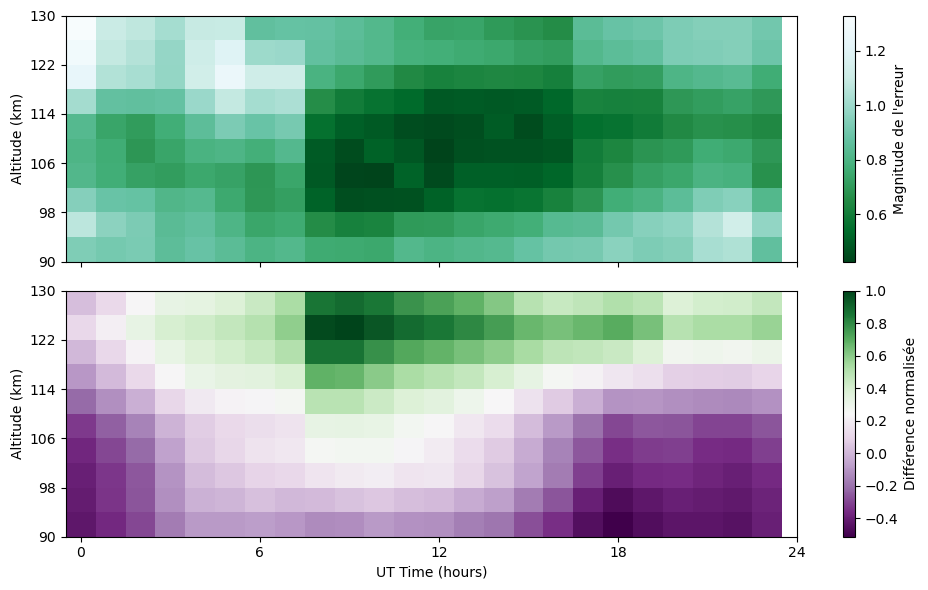

In [7]:
fig, axs = plt.subplots(2, figsize=(10, 6), sharex=True)

X, Y = np.meshgrid(time_bins, H_bins+2)

#grid = count.reshape(len(H_bins), len(time_bins))[::-1]
#sc = axs[0].pcolormesh(X, Y, grid, cmap='BuGn_r', vmin=0, vmax=1)
#cbar = fig.colorbar(sc, ax=axs[0])
#cbar.set_label(r"Fréquence d'apparition")

#grid = good.reshape(len(H_bins), len(time_bins))[::-1]
#sc = axs[1].pcolormesh(X, Y, grid, cmap='BuGn_r', vmin=0, vmax=1)
#cbar = fig.colorbar(sc, ax=axs[1])
#cbar.set_label(r'Fréquence de bon fit')

grid = err_mag.reshape(len(H_bins), len(time_bins))[::-1]
sc = axs[0].pcolormesh(X, Y, grid, cmap='BuGn_r')
cbar = fig.colorbar(sc, ax=axs[0])
cbar.set_label(r"Magnitude de l'erreur")

grid = norm_diff.reshape(len(H_bins), len(time_bins))[::-1]
sc = axs[1].pcolormesh(X, Y, grid, cmap='PRGn')
cbar = fig.colorbar(sc, ax=axs[1])
cbar.set_label(r'Différence normalisée')


for ax in axs:
    ax.set_ylabel('Altitude (km)')
    ax.set_yticks(np.linspace(90,130,6))
    ax.set_ylim(90,130)

axs[-1].set_xlabel('UT Time (hours)')
axs[-1].set_xticks(np.linspace(0,24,5))

plt.tight_layout()
plt.show()